In [1]:
from PIL import Image
import numpy as np
import os
DATA_DIR = '.\Indian'

In [46]:
# 1. Read image
a = os.path.join(DATA_DIR, 'S', '69'+'.jpg')

print(a)
img = Image.open(a)

.\Indian\S\69.jpg


In [9]:
# 2. Convert image to NumPy array
arr = np.asarray(img)
print(arr.shape)
# (771, 771, 3)

(128, 128, 3)


In [10]:
# 3. Convert 3D array to 2D list of lists
lst = []
for row in arr:
    tmp = []
    for col in row:
        tmp.append(str(col))
    lst.append(tmp)


In [11]:
# 4. Save list of lists to CSV
with open('my_file.csv', 'w') as f:
    for row in lst:
        f.write(','.join(row) + '\n')

In [16]:
import matplotlib.pyplot as plt


In [ ]:
plt.figure()
plt.imshow(lst)


In [19]:
import cv2

In [20]:
image = cv2.imread(a)

# Convert image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the original and grayscale image
cv2.imshow('Original Image', image)
cv2.imshow('Grayscale Image', gray_image)

# Wait for a key press and close all windows
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
print(gray_image)

[[12 11 13 ...  5  8 28]
 [12 11 12 ...  5  8 25]
 [12 11 11 ...  8 10 26]
 ...
 [ 3  3  3 ...  5  7 27]
 [ 4  4  4 ...  7  9 27]
 [24 24 24 ... 26 26 47]]


In [47]:
img = cv2.imread(a)     
# Convert image to grayscale
# img = cv2.resize(img,(28,28))
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img = np.asarray(gray_img)
norm_img = gray_img / 255.0
norm_img = norm_img.flatten()
# Flatten image to 1D array
flat_img = gray_img.flatten()
flat_img.size

print(flat_img)
print(norm_img)

[ 9 11 12 ... 29 27 46]
[0.03529412 0.04313725 0.04705882 ... 0.11372549 0.10588235 0.18039216]


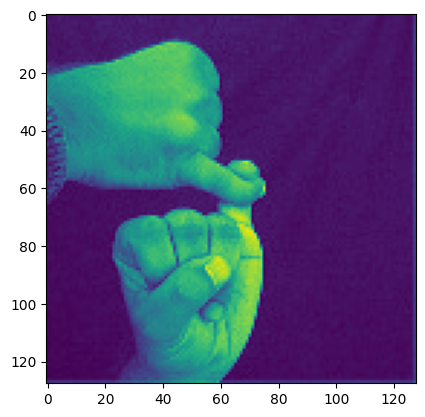

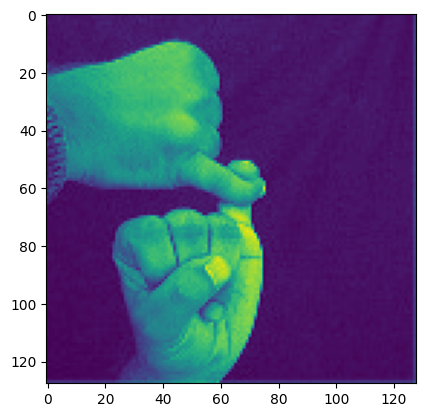

In [48]:
plt.figure()
plt.imshow(np.reshape(flat_img,(128,128)))
plt.figure()
plt.imshow(np.reshape(norm_img,(128,128)))

In [52]:
import cv2
import numpy as np
import os
import csv

# Set directory path containing images
directory_path = './Indian/N/'

# Set CSV file path and name
csv_path = 'dataset.csv'

# Set image dimensions
# img_rows, img_cols = 128, 128

# Initialize empty list for dataset
dataset = []
count = 0
# Iterate over images in directory
for filename in os.listdir(directory_path):
    if filename.endswith('.jpg') and count <10:
        count+=1
        # Read image
        img_path = directory_path + filename
        img = cv2.imread(img_path)
        print(img_path)
        
        # Resize image to set dimensions
        img = cv2.resize(img, (28,28))
        
        # Convert image to grayscale
        gray_img = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])
        
        # Normalize pixel values to range between 0 and 1
        norm_img = gray_img / 255.0
        
        # Flatten image to 1D array
        flat_img = norm_img.flatten()
        s =['N']
        s.extend(flat_img)
        # Append image array to dataset
        dataset.append(s)

# Save dataset to CSV file
with open(csv_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(dataset)

./Indian/N/0.jpg
./Indian/N/1.jpg
./Indian/N/10.jpg
./Indian/N/100.jpg
./Indian/N/1000.jpg
./Indian/N/1001.jpg
./Indian/N/1002.jpg
./Indian/N/1003.jpg
./Indian/N/1004.jpg
./Indian/N/1005.jpg


In [53]:
DATA_DIR = '.\Indian'

for alphabet in os.listdir(DATA_DIR):
    for imgPath in os.listdir(os.path.join(DATA_DIR, alphabet)):
        img = cv2.imread(os.path.join(DATA_DIR, alphabet, imgPath))
        img = cv2.resize(img, (30,30))
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        norm_img = gray_img / 255.0
        flat_img = norm_img.flatten()
        s =[alphabet]
        s.extend(flat_img)
        # Append image array to dataset
        dataset.append(s)
        

with open(csv_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(dataset)

In [54]:
len(dataset)

31955

In [ ]:
%pip install pandas


In [2]:
import pandas

In [3]:
dataset= pandas.read_csv('dataset.csv')

In [ ]:
dataset.head()